In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

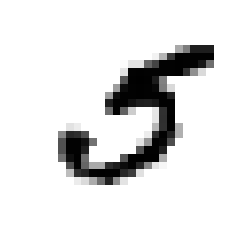

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
#import numpy as np
#shuffle_index = np.random.permutation(60000)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Training time: 0:00:01.635407
Train accuracy: 0.81035
Time to compute train accuracy: 0:00:19.252280 Train size: 60000
Test accuracy: 0.7809
Time to compute test accuracy: 0:00:04.254914 Test size: 10000


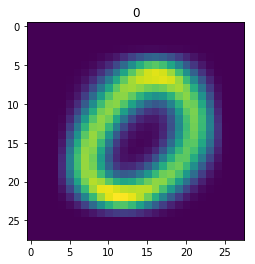

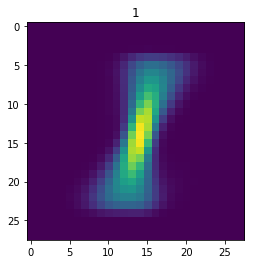

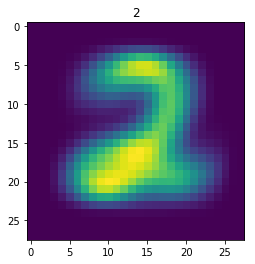

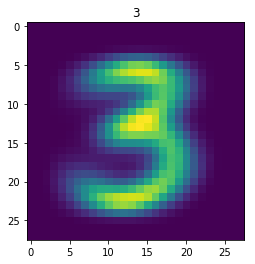

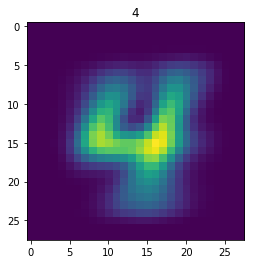

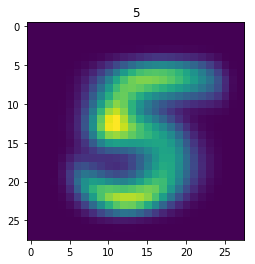

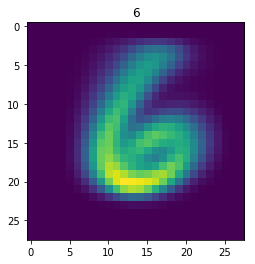

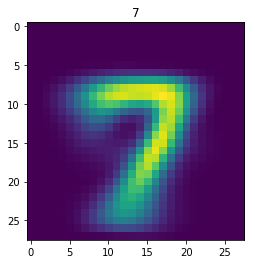

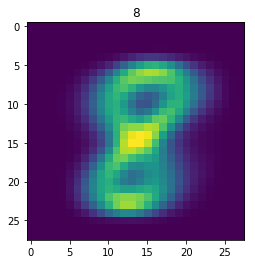

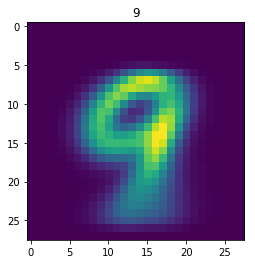

In [9]:
from future.utils import iteritems
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


if __name__ == '__main__':
    #X, Y = get_data(10000)
    #Ntrain = len(Y) // 2
    #Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    #Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    Xtrain = X_train
    Xtest = X_test
    Ytrain =y_train
    Ytest = y_test
    
    model = Bayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    # plot the mean of each class
    for c, g in iteritems(model.gaussians):
        plt.imshow(g['mean'].reshape(28, 28))
        plt.title(c)
        plt.show()